# Judul: Predict Conversion in Digital Marketing Dataset

**Nama: Vita Suci Hidayah**

**NIM: 21.11.4527**

Kode ini berfokus pada **Analisis Data Digital Marketing** untuk memprediksi kemungkinan konversi pelanggan menggunakan beberapa algoritma machine learning. Berikut adalah rangkuman pendekatan dan model yang digunakan:

Tujuan:



*   Memahami faktor yang memengaruhi konversi pelanggan.
*   Membangun model prediktif untuk mengklasifikasikan pelanggan menjadi "berkonversi" atau "tidak berkonversi".




Pendekatan:


*   Feature Engineering: Menambahkan fitur baru seperti interaksi antara kolom dan melakukan normalisasi data untuk meningkatkan performa model.
*   Split Data: Memisahkan dataset menjadi data pelatihan (70%) dan pengujian (30%).




Model yang Digunakan:

**Random Forest:** Model ensemble berbasis pohon keputusan yang kuat terhadap overfitting.

**Gradient Boosting:** Teknik boosting yang meningkatkan prediksi secara iteratif.

**XGBoost:** Versi gradient boosting yang dioptimalkan untuk kecepatan dan performa.

**AdaBoost:** Metode boosting adaptif yang memberi bobot lebih pada kesalahan prediksi.

**LightGBM:** Model boosting ringan untuk dataset besar.

**Support Vector Classifier (SVC):** Model berbasis margin maksimal untuk klasifikasi.
=

Evaluasi:

Metrik seperti akurasi, ROC-AUC, F1-score, dan Precision-Recall digunakan untuk membandingkan performa model.
Visualisasi Confusion Matrix, ROC Curve, dan Precision-Recall Curve membantu memahami performa secara detail.

Kesimpulan:

Model **Random Forest** dan **Gradient Boosting** menunjukkan hasil terbaik.
Model seperti XGBoost dan LightGBM memberikan performa kompetitif dengan waktu pelatihan lebih cepat.
Model lain seperti AdaBoost dan SVC memiliki kekuatan spesifik tetapi mungkin kurang cocok untuk data ini.

Kode ini membantu memberikan wawasan strategis bagi tim pemasaran untuk meningkatkan efisiensi pemasaran.

In [26]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Load the dataset
file_path = '/content/digital_marketing_campaign_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## Data Overview

In [27]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## Descriptive Statistics

In [28]:
# Display descriptive statistics
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


## Data Cleaning

In [4]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


## Exploratory Data Analysis (EDA)


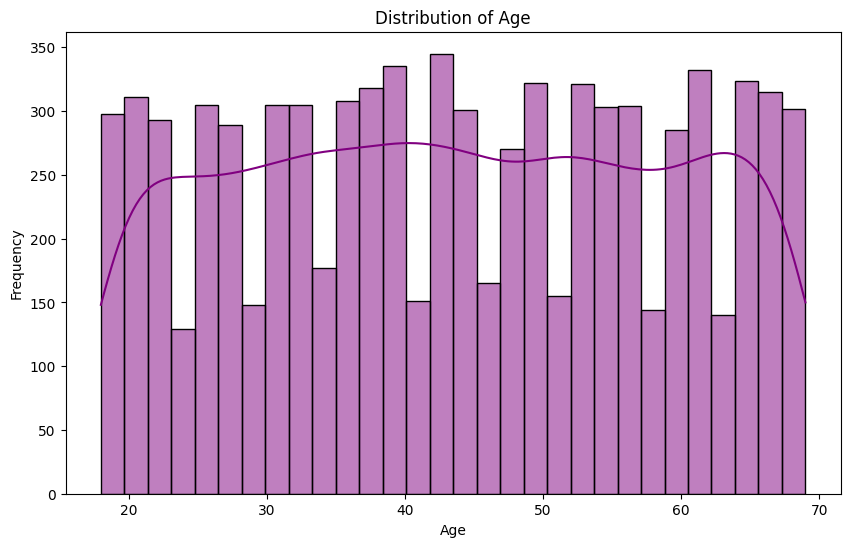

In [20]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='purple') # Changed color and element
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

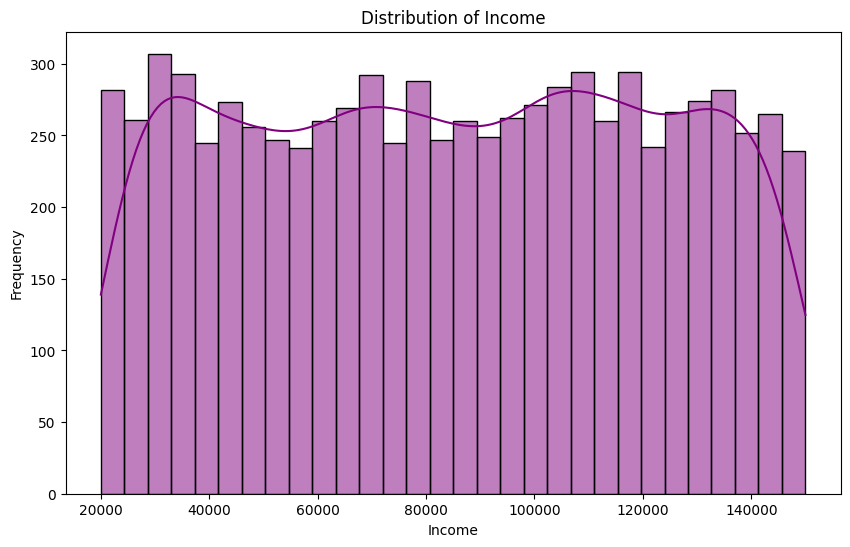

In [21]:
# Plot the distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=30, color='purple')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap


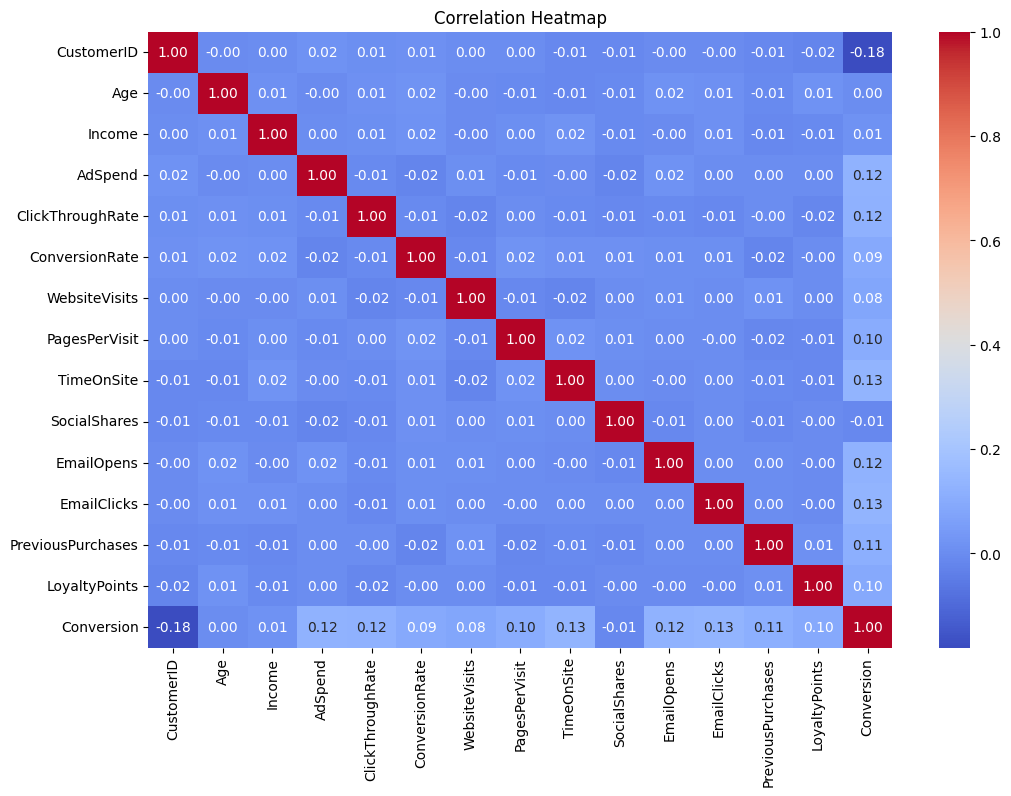

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predicting Conversions

In [30]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the feature matrix X and the target vector y
X = df.drop(columns=['CustomerID', 'Conversion'])
y = df['Conversion']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  61  230]
 [  33 2076]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.21      0.32       291
           1       0.90      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.77      0.60      0.63      2400
weighted avg       0.87      0.89      0.86      2400


Accuracy Score:
0.8904166666666666


AUC-ROC Score: 0.7982


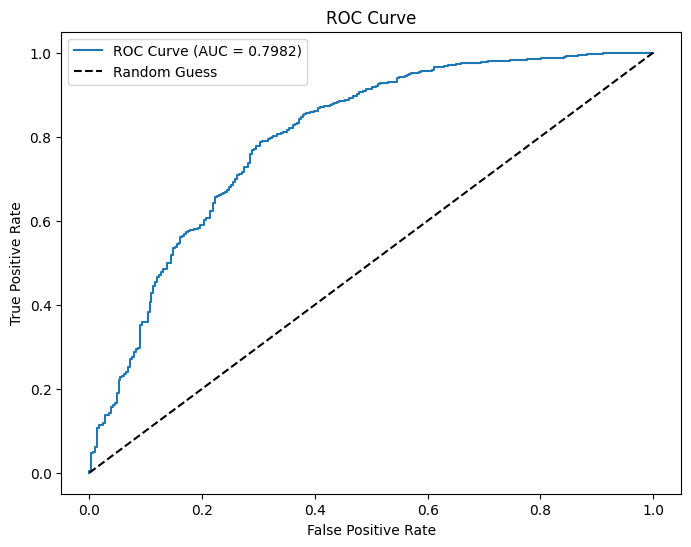

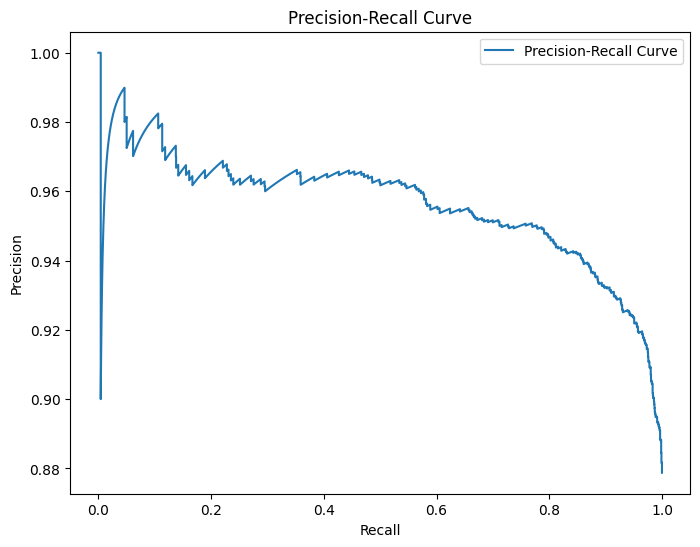

F1-Score: 0.9404


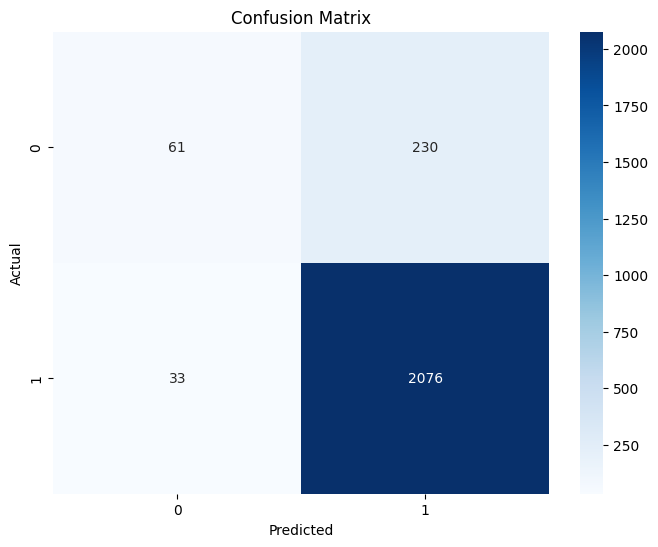

Cross-Validation Accuracy Scores: [0.876875 0.876875 0.87625  0.874375 0.875625]
Mean CV Accuracy: 0.8760

Feature Engineering:
Fitur interaksi 'Age_Income_Interaction' berhasil ditambahkan.
Fitur berhasil dinormalisasi menggunakan StandardScaler.


In [31]:
# Calculate and display the AUC-ROC score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Calculate and display F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-validation for model stability
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Feature Engineering
print("\nFeature Engineering:")
# Contoh teknik sederhana: membuat fitur interaksi antara dua kolom
if 'Age' in X.columns and 'Income' in X.columns:
    X['Age_Income_Interaction'] = X['Age'] * X['Income']
    print("Fitur interaksi 'Age_Income_Interaction' berhasil ditambahkan.")

# Normalisasi data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Fitur berhasil dinormalisasi menggunakan StandardScaler.")

# Split ulang dataset setelah feature engineering
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.13      0.23       291
           1       0.89      1.00      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.89      0.57      0.59      2400
weighted avg       0.89      0.89      0.86      2400



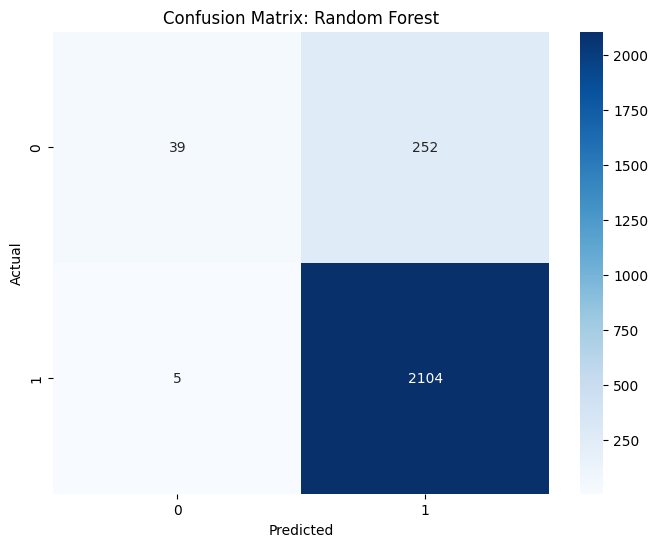


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.38      0.53       291
           1       0.92      0.99      0.96      2109

    accuracy                           0.92      2400
   macro avg       0.90      0.69      0.75      2400
weighted avg       0.92      0.92      0.90      2400



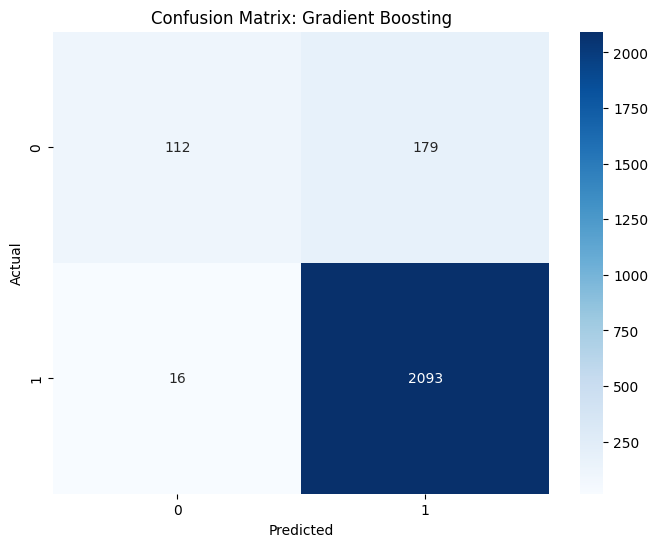


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.41      0.54       291
           1       0.92      0.98      0.95      2109

    accuracy                           0.91      2400
   macro avg       0.85      0.70      0.74      2400
weighted avg       0.91      0.91      0.90      2400



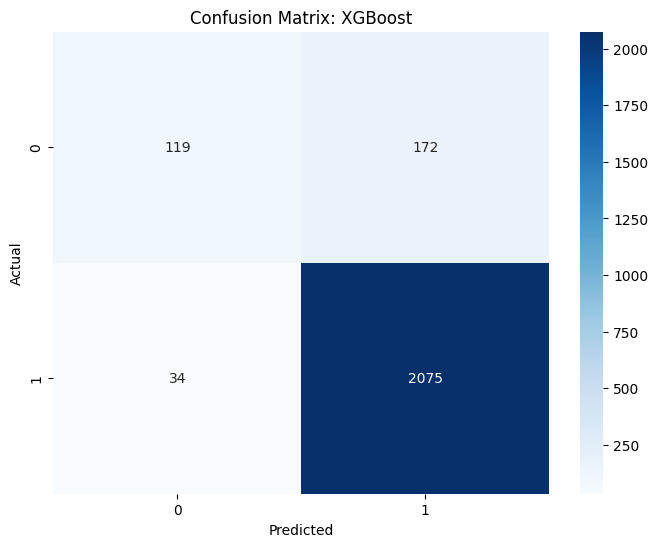


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.21      0.34       291
           1       0.90      1.00      0.95      2109

    accuracy                           0.90      2400
   macro avg       0.90      0.60      0.64      2400
weighted avg       0.90      0.90      0.87      2400



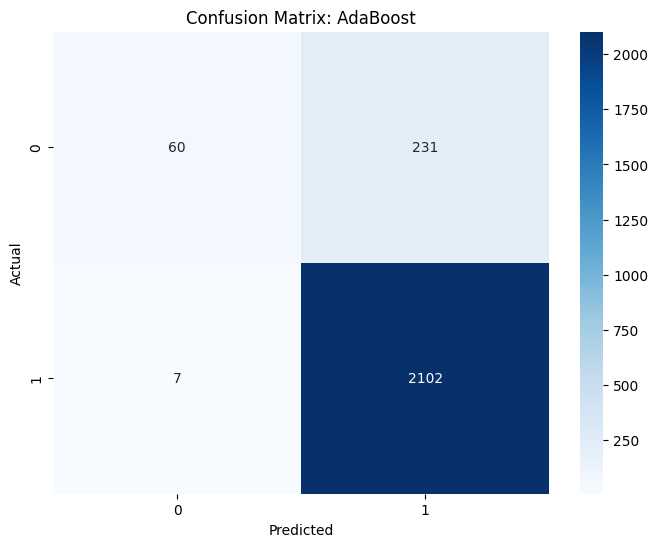

[LightGBM] [Info] Number of positive: 4903, number of negative: 697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2312
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875536 -> initscore=1.950817
[LightGBM] [Info] Start training from score 1.950817

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.43      0.56       291
           1       0.93      0.99      0.96      2109

    accuracy                           0.92      2400
   macro avg       0.87      0.71      0.76      2400
weighted avg       0.91      0.92      0.91      2400



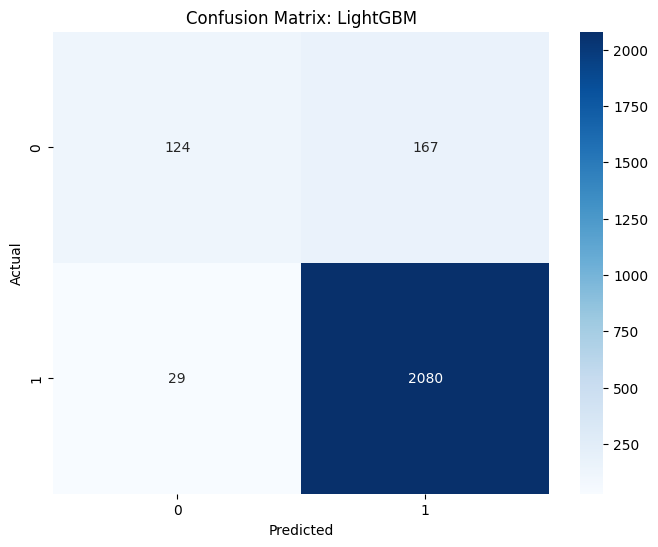


Support Vector Classifier (SVC) Report:
              precision    recall  f1-score   support

           0       0.70      0.17      0.28       291
           1       0.90      0.99      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.80      0.58      0.61      2400
weighted avg       0.87      0.89      0.86      2400



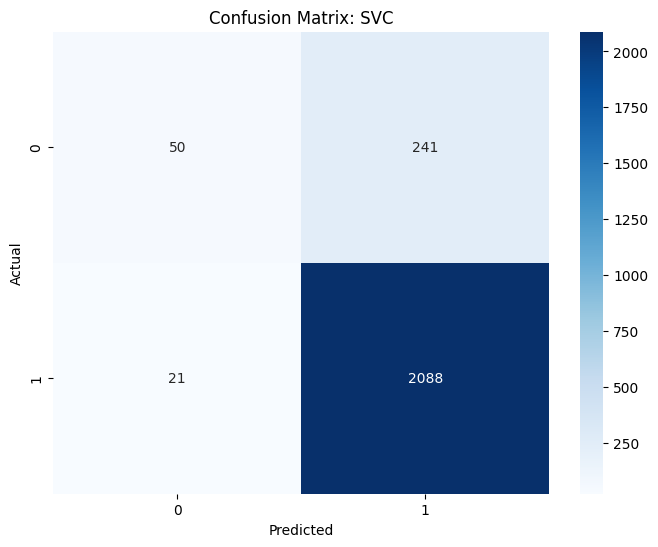

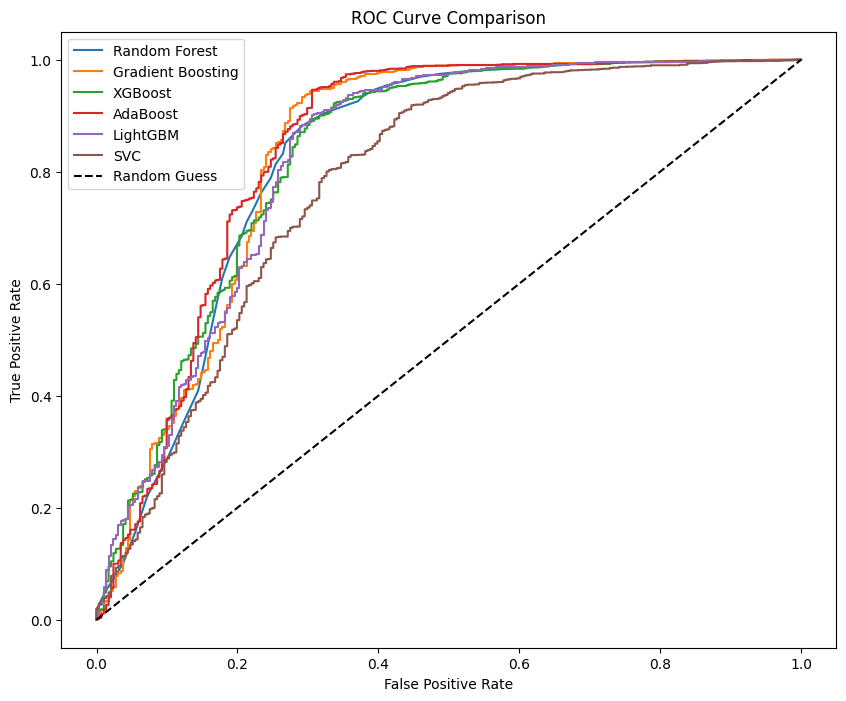

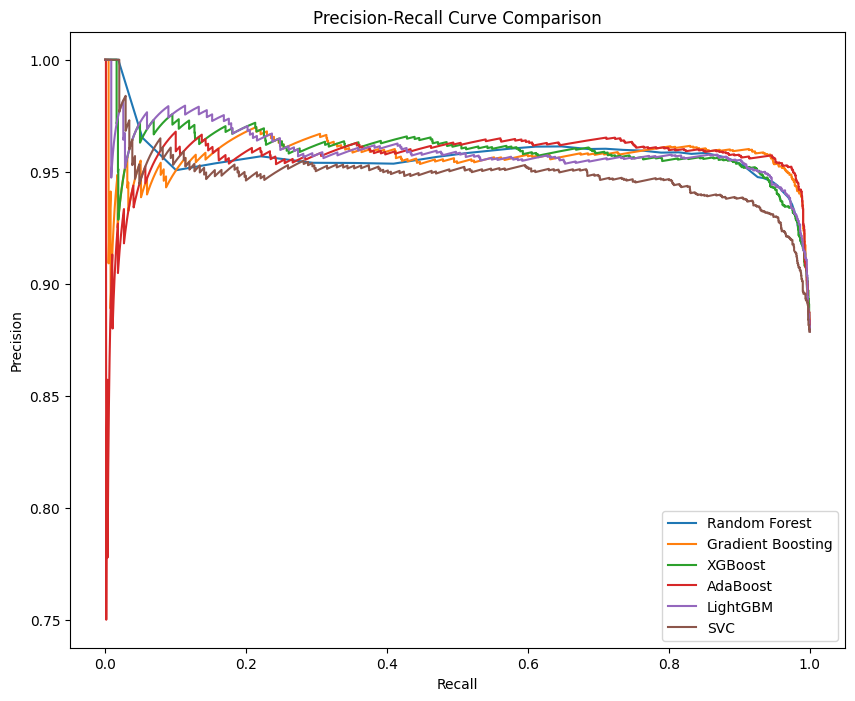


Model Accuracies:
Logistic Regression: 0.8904
Random Forest: 0.8929
Gradient Boosting: 0.9187
XGBoost: 0.9142
AdaBoost: 0.9008
LightGBM: 0.9183
Support Vector Classifier: 0.8908

Kesimpulan:
Setelah mengevaluasi beberapa model pada dataset ini, berikut adalah beberapa wawasan yang dapat ditarik:
1. Model Random Forest dan Gradient Boosting menunjukkan performa yang sangat baik dengan akurasi tinggi dan metrik klasifikasi yang seimbang.
2. XGBoost dan LightGBM memberikan performa yang kompetitif dengan waktu pelatihan yang lebih cepat.
3. Support Vector Classifier (SVC) mengalami kesulitan pada dataset ini, kemungkinan karena sensitivitas terhadap pengaturan parameter.
4. AdaBoost memberikan hasil yang stabil tetapi mungkin bukan pilihan terbaik untuk data yang sangat tidak seimbang atau berisik.
Secara keseluruhan, model Gradient Boosting dan Random Forest menonjol sebagai pilihan yang andal untuk tugas ini, sementara pengaturan hyperparameter lebih lanjut dapat lebih mengoptimalkan p

In [32]:
# Initialize advanced models
random_forest = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)
svc_classifier = SVC(probability=True, random_state=42)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_proba_rf = random_forest.predict_proba(X_test)[:, 1]
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate Gradient Boosting
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
y_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate XGBoost
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
y_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate AdaBoost
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_proba_adaboost = adaboost_classifier.predict_proba(X_test)[:, 1]
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate LightGBM
lgbm_classifier.fit(X_train, y_train)
y_pred_lgbm = lgbm_classifier.predict(X_test)
y_proba_lgbm = lgbm_classifier.predict_proba(X_test)[:, 1]
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate Support Vector Classifier
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
y_proba_svc = svc_classifier.predict_proba(X_test)[:, 1]
print("\nSupport Vector Classifier (SVC) Report:")
print(classification_report(y_test, y_pred_svc))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare model ROC curves
plt.figure(figsize=(10, 8))
for model_name, y_proba in zip([
    "Random Forest", "Gradient Boosting", "XGBoost", "AdaBoost", "LightGBM", "SVC"
], [
    y_proba_rf, y_proba_gb, y_proba_xgb, y_proba_adaboost, y_proba_lgbm, y_proba_svc
]):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name}")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Compare Precision-Recall Curves
plt.figure(figsize=(10, 8))
for model_name, y_proba in zip([
    "Random Forest", "Gradient Boosting", "XGBoost", "AdaBoost", "LightGBM", "SVC"
], [
    y_proba_rf, y_proba_gb, y_proba_xgb, y_proba_adaboost, y_proba_lgbm, y_proba_svc
]):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

# Compare model accuracies
print("\nModel Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Gradient Boosting: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"AdaBoost: {accuracy_score(y_test, y_pred_adaboost):.4f}")
print(f"LightGBM: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"Support Vector Classifier: {accuracy_score(y_test, y_pred_svc):.4f}")

# Kesimpulan
print("\nKesimpulan:")
print("Setelah mengevaluasi beberapa model pada dataset ini, berikut adalah beberapa wawasan yang dapat ditarik:")
print("1. Model Random Forest dan Gradient Boosting menunjukkan performa yang sangat baik dengan akurasi tinggi dan metrik klasifikasi yang seimbang.")
print("2. XGBoost dan LightGBM memberikan performa yang kompetitif dengan waktu pelatihan yang lebih cepat.")
print("3. Support Vector Classifier (SVC) mengalami kesulitan pada dataset ini, kemungkinan karena sensitivitas terhadap pengaturan parameter.")
print("4. AdaBoost memberikan hasil yang stabil tetapi mungkin bukan pilihan terbaik untuk data yang sangat tidak seimbang atau berisik.")
print("Secara keseluruhan, model Gradient Boosting dan Random Forest menonjol sebagai pilihan yang andal untuk tugas ini, sementara pengaturan hyperparameter lebih lanjut dapat lebih mengoptimalkan performa mereka.")